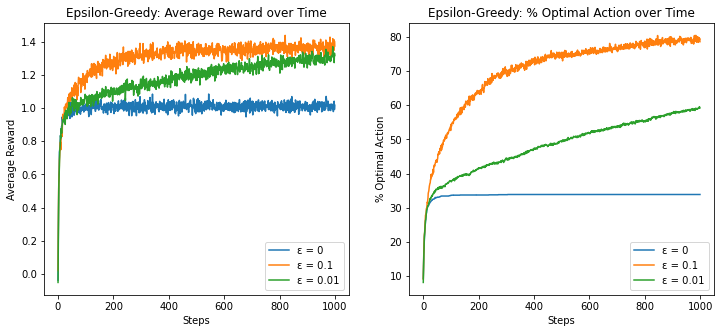

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Number of bandit arms (actions)
k = 10

# Number of time steps (iterations)
time_steps = 1000

# Number of independent runs (for averaging performance)
num_runs = 2000  

# Epsilon values for comparison
epsilons = [0, 0.1, 0.01]  # 0 (greedy), 0.1 (ε-greedy), 0.01 (less exploration)

# Initialize storage for results
average_rewards = np.zeros((len(epsilons), time_steps))
optimal_action_counts = np.zeros((len(epsilons), time_steps))

# Run simulations for different epsilon values
for eps_idx, epsilon in enumerate(epsilons):
    for run in range(num_runs):
        # Generate true action values (stationary testbed)
        q_true = np.random.normal(0, 1, k)  # True values for each action
        optimal_action = np.argmax(q_true)  # The best action index

        # Initialize estimated values and action counts
        q_estimates = np.zeros(k)  # Initial action-value estimates (set to 0)
        action_counts = np.zeros(k)  # Track how many times each action is taken

        for t in range(time_steps):
            # Epsilon-greedy action selection
            if np.random.rand() < epsilon:
                action = np.random.choice(k)  # Random action (exploration)
            else:
                action = np.argmax(q_estimates)  # Best known action (exploitation)

            # Generate reward from a normal distribution centered at the true action value
            reward = np.random.normal(q_true[action], 1)  # Mean = q_true[action], Std Dev = 1

            # Update action count
            action_counts[action] += 1

            # Update Q-value estimate using incremental mean update
            q_estimates[action] += (reward - q_estimates[action]) / action_counts[action]

            # Store results
            average_rewards[eps_idx, t] += reward
            if action == optimal_action:
                optimal_action_counts[eps_idx, t] += 1

    # Compute averages over multiple runs
    average_rewards[eps_idx] /= num_runs
    optimal_action_counts[eps_idx] /= num_runs

# Plot results
plt.figure(figsize=(12, 5))

# Average rewards over time
plt.subplot(1, 2, 1)
for eps_idx, epsilon in enumerate(epsilons):
    plt.plot(average_rewards[eps_idx], label=f"ε = {epsilon}")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.title("Epsilon-Greedy: Average Reward over Time")
plt.legend()

# Optimal action selection percentage over time
plt.subplot(1, 2, 2)
for eps_idx, epsilon in enumerate(epsilons):
    plt.plot(optimal_action_counts[eps_idx] * 100, label=f"ε = {epsilon}")
plt.xlabel("Steps")
plt.ylabel("% Optimal Action")
plt.title("Epsilon-Greedy: % Optimal Action over Time")
plt.legend()

plt.show()
